# **mulailah dengan mengimpor library yang diperlukan untuk memplot grafik**

In [ ]:
import networkx as nx
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

# **secara acak generate graph dengan 7 node di mana probabilitas dua node terhubung adalah 40%.**

In [ ]:
G = nx.random_graphs.fast_gnp_random_graph(7, 0.4)

# **mendefinisikan dan memanggil fungsi yang memplot berbagai komponen grafik.**

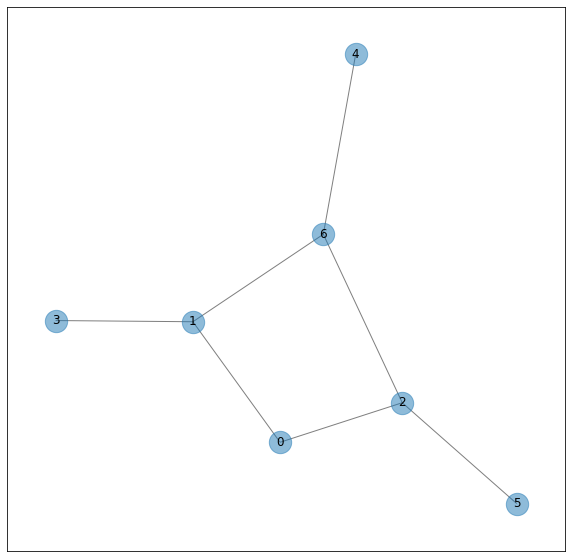

In [ ]:
def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=500, alpha=0.5)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
draw_graph(G)

# **List graph dan node**

In [ ]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6))

In [ ]:
G.edges

EdgeView([(0, 1), (0, 2), (1, 3), (1, 6), (2, 5), (2, 6), (4, 6)])

# **mengimplementasikan algoritma Breadth First Search. Untuk menentukan node yang berdekatan dengan node saat ini, temukan semua tupel yang berisi node saat ini, dan tambahkan node lainnya.**

In [ ]:
def bfs(graph, starting_node):
    visited = []
    queue = [starting_node]
    
    while queue:
        node = queue.pop(0)
        if node not in visited:
            visited.append(node)            
            for edge in graph.edges:
                if edge[0] == node:
                    queue.append(edge[1])
                elif edge[1] == node:
                    queue.append(edge[0])
    return visited

# **panggil fungsi menggunakan grafik yang baru saja dibuat dan sebagai contoh ditetapkan simpul 1 sebagai simpul awal.**

In [ ]:
bfs(G, 1)

[1, 0, 3, 6, 2, 4, 5]

# **fungsi untuk menemukan jalur terpendek menggunakan BFS mirip dengan code yang sebelumnya, hanya saja ada penambahan argumen untuk simpul yang ingin ditemukan jalurnya. Jika salah satu node tetangga adalah tujuan, maka pencarian selesai dan mengembalikan jalur baru. Jika tidak, pencarian terus diulangi hingga semua jalur yang tersisa dalam antrian selesai dikunjungi.**

In [ ]:
def find_shortest_path(graph, starting_node, goal):
    visited = []
    queue = [[starting_node]]
    
    while queue:
        path = queue.pop(0)
        node = path[-1]
        if node not in visited:
            neighbours = []
            for edge in graph.edges:
                if edge[0] == node:
                    neighbours.append(edge[1])
                elif edge[1] == node:
                    neighbours.append(edge[0])
            for neighbour in neighbours:
                new_path = list(path)
                new_path.append(neighbour)
                queue.append(new_path)
                
                if neighbour == goal:
                    return new_path
            
            visited.append(node)
            
    return []

In [ ]:
find_shortest_path(G, 1, 3)

[1, 3]

# **INI ADALAH CODE LAIN DARI BFS DIMANA NODE NYA SUDAH DIDEFINISIKAN DI AWAL**

In [2]:
graph = {
  '5' : ['3','7'],
  '3' : ['2', '4'],
  '7' : ['8'],
  '2' : [],
  '4' : ['8'],
  '8' : []
}

visited = [] # List for visited nodes.
queue = []     #Initialize a queue

def bfs(visited, graph, node): #function for BFS
  visited.append(node)
  queue.append(node)

  while queue:          # Creating loop to visit each node
    m = queue.pop(0) 
    print (m, end = " ") 

    for neighbour in graph[m]:
      if neighbour not in visited:
        visited.append(neighbour)
        queue.append(neighbour)

# Driver Code
print("Following is the Breadth-First Search")
bfs(visited, graph, '5')    # function calling

Following is the Breadth-First Search
5 3 7 2 4 8 